In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day10_10_07_2025\Wine Quality Selection\winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
X = df.drop("citric acid", axis = 1)

In [7]:
X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
import matplotlib.pyplot as plt

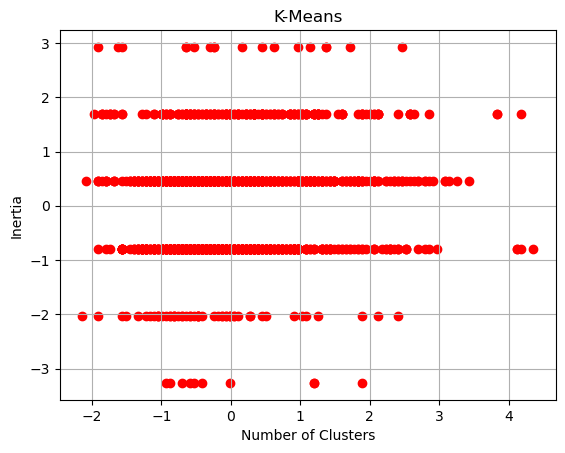

In [11]:
plt.scatter(X_scaled[:,0], X_scaled[:,10], color = 'red')
plt.title("K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 44)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=44)

In [14]:
wcsse = []
for i in range (1, 12):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmean.fit(X_scaled)
    wcsse.append(kmean.inertia_)

In [15]:
wcsse

[17588.999999999993,
 14961.494075788945,
 13604.90964287562,
 11942.187387956112,
 10524.387511159079,
 9735.053440824653,
 9314.613589667715,
 8911.581769355995,
 8473.619134293021,
 8128.633514109695,
 7993.28401523818]

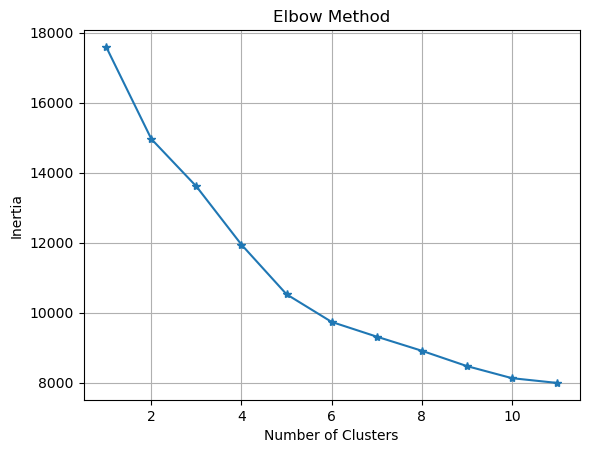

In [16]:
plt.plot(range(1,12), wcsse, marker = '*')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [17]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 44)
kmeans1.fit(X_scaled)
clusters = kmeans1.predict(X_scaled)

In [18]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_scaled['Clusters'] = clusters

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.98069005, -1.16902982],
       [-0.06531267, -1.97212375],
       [-0.15657383, -1.29011947],
       ...,
       [-1.34492309,  0.22979712],
       [-2.1412084 , -1.17609232],
       [-1.18430999,  0.75764318]])

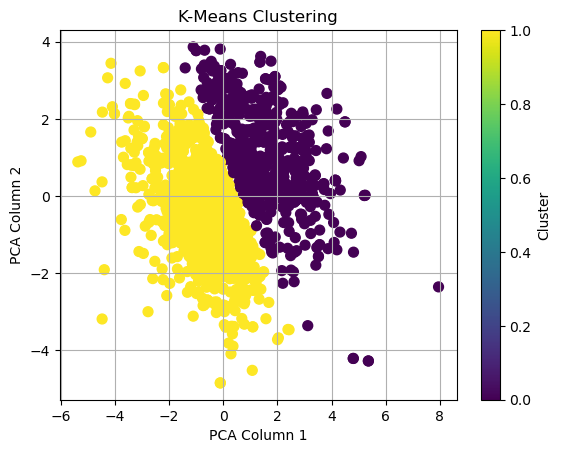

In [23]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap = 'viridis', s = 50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Column 1")
plt.ylabel("PCA Column 2")
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()